In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\JARVIS\OneDrive\Desktop\Maam\Employee-turnover (2).csv')
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

In [5]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [6]:
df.rename(columns={'Attrition (Yes/No)':'Attrition'},inplace=True)

In [7]:
for i in range(len(df)):
    if(df['Attrition'][i]=='Yes'):
        df['Attrition'][i]=1
    else:
        df['Attrition'][i]=0
df.Attrition.value_counts()           

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_3748\3573788827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'][i]=1
C:\Users\JARVIS\AppData\Local\Temp\ipykernel_3748\3573788827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'][i]=0


0    1233
1     237
Name: Attrition, dtype: int64

In [10]:
df['Attrition']=df['Attrition'].astype('int')

In [14]:
df.columns

Index(['Employee Count', 'Employee ID', 'Department', 'Job Role', 'Gender',
       'Age', 'Marital Status', 'Education', 'Education Field',
       'Business Travel', 'Distance From Home (kms)', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income (USD)',
       'Salary Hike (%)', 'Stock Option Level', 'Over Time',
       'No. of Companies Worked', 'Total Working Years', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Environment Satisfaction',
       'Training Times Last Year', 'Work Life Balance',
       'Relationship Satisfaction', 'Attrition'],
      dtype='object')

In [15]:
df.drop(labels=['Employee Count','Employee ID'],axis=1,inplace=True)
df.columns

Index(['Department', 'Job Role', 'Gender', 'Age', 'Marital Status',
       'Education', 'Education Field', 'Business Travel',
       'Distance From Home (kms)', 'Job Involvement', 'Job Level',
       'Job Satisfaction', 'Monthly Income (USD)', 'Salary Hike (%)',
       'Stock Option Level', 'Over Time', 'No. of Companies Worked',
       'Total Working Years', 'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Environment Satisfaction', 'Training Times Last Year',
       'Work Life Balance', 'Relationship Satisfaction', 'Attrition'],
      dtype='object')

In [16]:
corr=df.corr()
corr

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Attrition
Age,1.000000,-0.001686,0.509604,0.497855,0.040287,0.037510,0.299358,0.680381,0.311309,0.212901,0.216513,0.202089,-0.019621,-0.159205
Distance From Home (kms),-0.001686,1.000000,0.005303,-0.017014,0.015960,0.044872,-0.027640,0.004628,0.009508,0.018845,0.010029,0.014406,-0.036942,0.077924
Job Level,0.509604,0.005303,1.000000,0.950300,0.010361,0.013984,0.142812,0.782208,0.534739,0.389447,0.353885,0.375281,-0.018191,-0.169105
Monthly Income (USD),0.497855,-0.017014,0.950300,1.000000,0.015050,0.005408,0.149919,0.772893,0.514285,0.363818,0.344978,0.344079,-0.021736,-0.159840
Salary Hike (%),0.040287,0.015960,0.010361,0.015050,1.000000,0.041906,-0.000315,0.019554,-0.002812,0.031862,0.001454,0.016776,0.012065,-0.180424
Stock Option Level,0.037510,0.044872,0.013984,0.005408,0.041906,1.000000,0.031647,0.010136,0.015058,0.050818,0.014352,0.024698,0.011274,-0.137145
No. of Companies Worked,0.299358,-0.027640,0.142812,0.149919,-0.000315,0.031647,1.000000,0.238689,-0.118331,-0.090788,-0.035758,-0.110889,-0.062599,0.039826
Total Working Years,0.680381,0.004628,0.782208,0.772893,0.019554,0.010136,0.238689,1.000000,0.628133,0.460365,0.404858,0.459188,-0.035662,-0.171063
Years At Company,0.311309,0.009508,0.534739,0.514285,-0.002812,0.015058,-0.118331,0.628133,1.000000,0.758754,0.618409,0.769212,0.003569,-0.134392
Years In Current Role,0.212901,0.018845,0.389447,0.363818,0.031862,0.050818,-0.090788,0.460365,0.758754,1.000000,0.548056,0.714365,-0.005738,-0.160545


<AxesSubplot:>

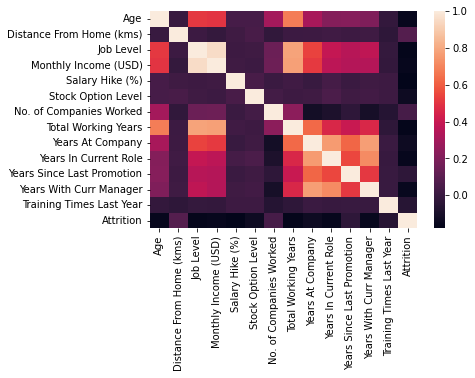

In [18]:
sns.heatmap(corr)

In [27]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

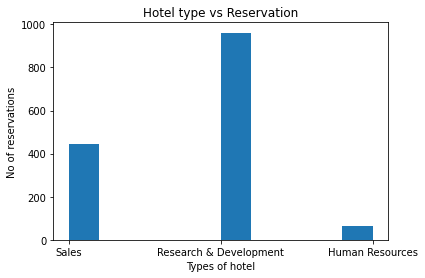

In [65]:
plt.hist(df.Department)
plt.xlabel("Types of hotel")
plt.ylabel("No of reservations")
plt.title("Hotel type vs Reservation")
plt.show()

<AxesSubplot:>

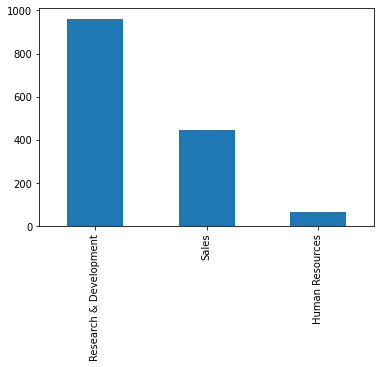

In [26]:
df.Department.value_counts().plot.bar()

In [35]:
df.Department.dtype

dtype('O')

In [36]:
ob_col=[]
int_col=[]
for i in df:
    if(df[i].dtype=='object'):
        ob_col.append(i)
    else:
        int_col.append(i)
print('Object cols=',ob_col)
print('Int col=',int_col)            

Object cols= ['Department', 'Job Role', 'Gender', 'Marital Status', 'Education', 'Education Field', 'Business Travel', 'Job Involvement', 'Job Satisfaction', 'Over Time', 'Environment Satisfaction', 'Work Life Balance', 'Relationship Satisfaction']
Int col= ['Age', 'Distance From Home (kms)', 'Job Level', 'Monthly Income (USD)', 'Salary Hike (%)', 'Stock Option Level', 'No. of Companies Worked', 'Total Working Years', 'Years At Company', 'Years In Current Role', 'Years Since Last Promotion', 'Years With Curr Manager', 'Training Times Last Year', 'Attrition']


<AxesSubplot:xlabel='Department', ylabel='count'>

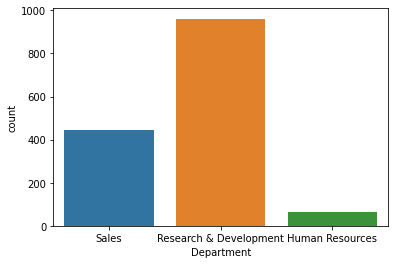

In [40]:
sns.countplot(x=df.Department)

Q1) How does Department is affecting Attrition column

In [54]:
pd.crosstab(df.Department,df.Attrition,margins=True)

Attrition,0,1,All
Department,,,
Human Resources,51,12,63
Research & Development,828,133,961
Sales,354,92,446
All,1233,237,1470


<AxesSubplot:xlabel='Department', ylabel='count'>

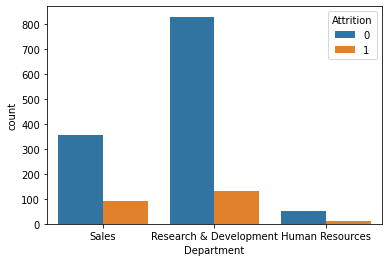

In [41]:
sns.countplot(x=df.Department,hue=df.Attrition)

In [78]:
df[['Attrition','Department']].groupby(['Department']).mean()

,Attrition
Department,
Human Resources,0.190476
Research & Development,0.138398
Sales,0.206278


<AxesSubplot:xlabel='Department', ylabel='Attrition'>

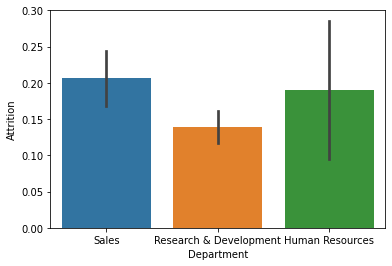

In [69]:
sns.barplot(x=df.Department,y=df.Attrition)

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

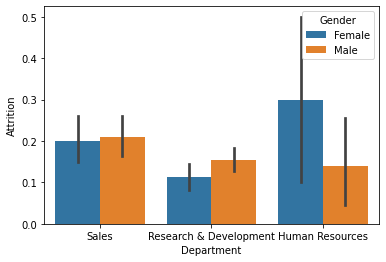

In [60]:
sns.barplot(x=df.Department,y=df.Attrition,hue=df.Gender)

In [79]:
df[['Attrition','Department','Gender']].groupby(['Department','Gender']).mean()

Attrition
Department             Gender           
Human Resources        Female   0.300000
                       Male     0.139535
Research & Development Female   0.113456
                       Male     0.154639
Sales                  Female   0.201058
                       Male     0.210117

In [85]:
pd.crosstab(df['Job Satisfaction'],df.Attrition,margins=True)

Attrition,0,1,All
Job Satisfaction,,,
High,369,73,442
Low,223,66,289
Medium,234,46,280
Very High,407,52,459
All,1233,237,1470


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Job Satisfaction', ylabel='count'>

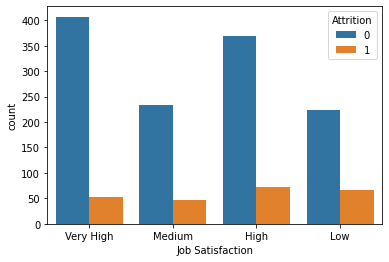

In [82]:
sns.countplot(df['Job Satisfaction'],hue=df.Attrition)

In [86]:
df[['Job Satisfaction','Attrition']].groupby('Job Satisfaction').mean()

,Attrition
Job Satisfaction,
High,0.165158
Low,0.228374
Medium,0.164286
Very High,0.113290


<AxesSubplot:xlabel='Job Satisfaction', ylabel='Attrition'>

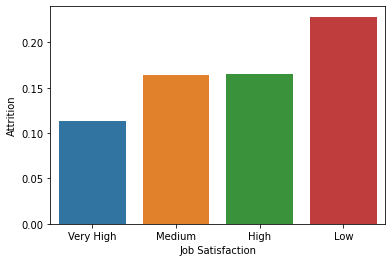

In [89]:
sns.barplot(x=df['Job Satisfaction'],y=df.Attrition,ci=None)

<AxesSubplot:xlabel='Job Satisfaction', ylabel='Attrition'>

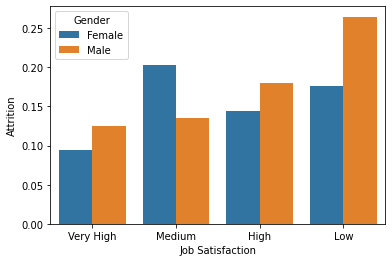

In [91]:
sns.barplot(x=df['Job Satisfaction'],y=df.Attrition,hue=df.Gender,ci=None)

In [93]:
df[['Attrition','Job Satisfaction','Gender']].groupby(['Job Satisfaction','Gender']).mean()

Attrition
Job Satisfaction Gender           
High             Female   0.143646
                 Male     0.180077
Low              Female   0.176471
                 Male     0.264706
Medium           Female   0.203390
                 Male     0.135802
Very High        Female   0.094118
                 Male     0.124567

In [92]:
pd.crosstab(df['Job Satisfaction'],df.Gender,margins=True)

Gender,Female,Male,All
Job Satisfaction,,,
High,181,261,442
Low,119,170,289
Medium,118,162,280
Very High,170,289,459
All,588,882,1470
